<center>
    <h1>PYTHON PROGRAMMING</h1>
    <h2>ENDSEM PROJECT</h2>
    <h2>IPL DATA ANALYSIS</h2>
</center>    
    <h4>NAME : Dheeraj</h4>
    <b>ENROLL NO. : 200330</b>

<hr>
<b>ABOUT THE FILE</b>
<br>
'IPL Ball-by-Ball 2008-2020.csv' - Contains the ball by ball data of the whole Indian Premier League tournament from year 2008 to 2020
<br>
'IPL Matches 2008-2020.csv' - Contains the Information of Matches like teams , venue , umpires etc. , of the whole Indian Premier League tournament from year 2008 to 2020
<hr>
<b>Data Link :</b>
https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020
<br>

In [1]:
#importing libraries and files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
B_Data = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
M_Data = pd.read_csv("IPL Matches 2008-2020.csv")

Beginning with the basic Steps , since we have two csv files , we can create a class 'CSVFileInfo' and make the two files as objects of this class and then simple call the 'display_summary' method to get all the basic info of the file.

In [2]:
class CSVFileInfo:
    def __init__(self, path, file_name):
        self.path = path
        self.file_name = file_name
    def display_summary(self):
        try:
            data = pd.read_csv(self.path + self.file_name)
        except FileNotFoundError:
            print("File Not Found , check file path again !")
        else:
            print(self.file_name)
            print(data.info())
            print(data.head())
            print(data.tail())
            print(data.isnull().sum())

In [3]:
BallData = CSVFileInfo("C:\\Users\\Dheeraj Mehlawat\\Desktop\\4th Semester\\Python Programming\\ENDSEM PROJECT\\", "IPL Ball-by-Ball 2008-2020.csv")
MatchData = CSVFileInfo("C:\\Users\\Dheeraj Mehlawat\\Desktop\\4th Semester\\Python Programming\\ENDSEM PROJECT\\", "IPL Matches 2008-2020.csv")

In [4]:
newdata = CSVFileInfo("C:\\Users\\Dheeraj Mehlawat\\Deskt","NewData")

In [5]:
newdata.display_summary()

File Not Found , check file path again !


In [6]:
BallData.display_summary()

IPL Ball-by-Ball 2008-2020.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting

We have null values in 4 columns that is 'dismissal_kind' , 'player_dismissed' , 'fielder' and 'extras_type' , which is justified as these columns can only have values if a player is being dismissed , got caught or runout by a feilder , or if extras are given on a delivery . so this data is valid to work upon and no rows need to be dropped or removed .

In [7]:
MatchData.display_summary()

IPL Matches 2008-2020.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    obj

# 1. BEST PLAYERS IN ALL CATEGORIES

# 1.1 TOP RUN SCORER

In [8]:
run_scorers = B_Data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).reset_index().rename(columns={'batsman_runs':'Total_Runs'})

In [9]:
run_scorers

,batsman,Total_Runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


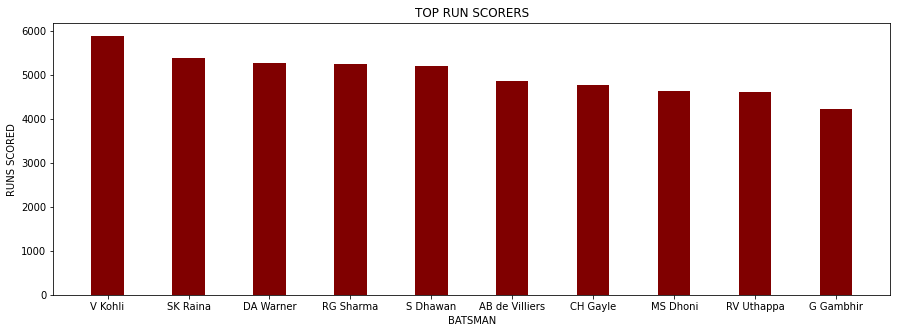

In [10]:
fig = plt.figure(figsize = (15, 5))
plt.bar(run_scorers['batsman'],run_scorers['Total_Runs'],color ='maroon',width = 0.4)
plt.title("TOP RUN SCORERS")
plt.xlabel("BATSMAN")
plt.ylabel("RUNS SCORED")
plt.show()

# 1.2 TOP WICKET TAKER

In [11]:
B_Data['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

Among these only those wickets are considered as bowler's wicket where dismissal kind is 'caught' , 'bowled' , 'lbw', 
      'stumped' , 'caught and bowled' or 'hit wicket'

In [12]:
BowlersWicket = [ 'caught' , 'bowled' , 'lbw', 'stumped' , 'caught and bowled' , 'hit wicket']

In [13]:
BowlerWicketData = B_Data[B_Data['dismissal_kind'].isin(BowlersWicket)]

In [14]:
wicket_takers = BowlerWicketData.groupby('bowler')['is_wicket'].count().sort_values(ascending = False).head(10).reset_index().rename(columns={'is_wicket':'Total_Wickets'})

In [15]:
wicket_takers

,bowler,Total_Wickets
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,153
4,Harbhajan Singh,150
5,R Ashwin,138
6,B Kumar,136
7,SP Narine,127
8,YS Chahal,121
9,UT Yadav,119


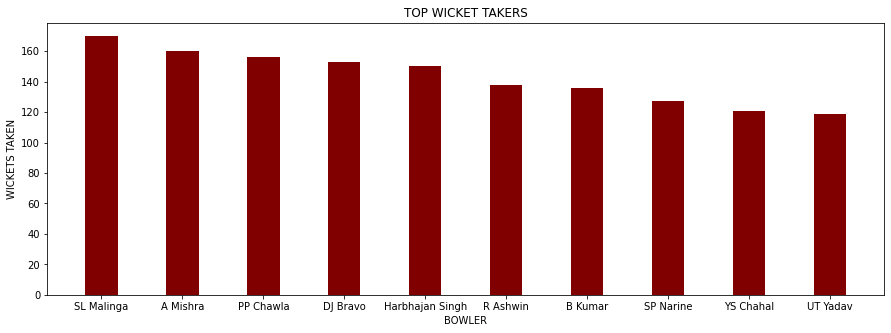

In [16]:
fig = plt.figure(figsize = (15, 5))
plt.bar(wicket_takers['bowler'],wicket_takers['Total_Wickets'],color ='maroon',width = 0.4)
plt.title("TOP WICKET TAKERS")
plt.xlabel("BOWLER")
plt.ylabel("WICKETS TAKEN")
plt.show()

# 1.3 BATSMEN WITH MOST BOUNDARIES ( 4's + 6's )

In [17]:
BoundaryData = B_Data[B_Data['batsman_runs'].isin([4,6])].reset_index()

In [18]:
boundaries = BoundaryData.groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10).reset_index().rename(columns={'batsman_runs':'Total_Boundaries'})

In [19]:
boundaries

,batsman,Total_Boundaries
0,CH Gayle,733
1,V Kohli,706
2,DA Warner,705
3,S Dhawan,700
4,SK Raina,687
5,RG Sharma,672
6,AB de Villiers,625
7,RV Uthappa,617
8,SR Watson,566
9,G Gambhir,551


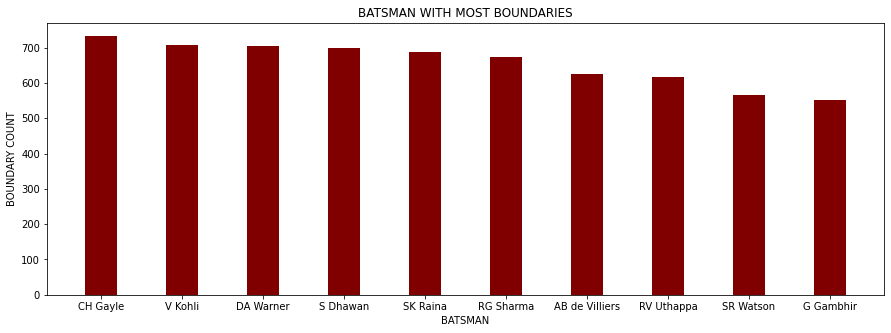

In [20]:
fig = plt.figure(figsize = (15, 5))
plt.bar(boundaries['batsman'],boundaries['Total_Boundaries'],color ='maroon',width = 0.4)
plt.title("BATSMAN WITH MOST BOUNDARIES")
plt.xlabel("BATSMAN")
plt.ylabel("BOUNDARY COUNT")
plt.show()

# 1.4 MOST 'PLAYER OF THE MATCH' AWARDS

In [21]:
playerofmatch = M_Data.groupby('player_of_match')['id'].count().sort_values(ascending = False).head(10).reset_index().rename(columns={'player_of_match':'Player Name','id':'Award count'})

In [22]:
playerofmatch

,Player Name,Award count
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,16
7,SK Raina,14
8,V Kohli,13
9,G Gambhir,13


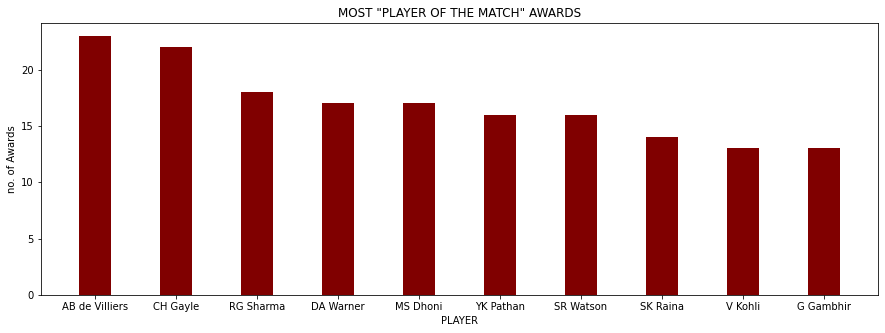

In [23]:
fig = plt.figure(figsize = (15, 5))
plt.bar(playerofmatch['Player Name'],playerofmatch['Award count'],color ='maroon',width = 0.4)
plt.title('MOST "PLAYER OF THE MATCH" AWARDS')
plt.xlabel("PLAYER")
plt.ylabel("no. of Awards")
plt.show()

# 1.5 MOST 50+ SCORES BY A BATSMAN

In [24]:
PlayerScores = B_Data.groupby(['id','batsman'])['batsman_runs'].sum().reset_index().rename(columns={'id':'50+ Scores'})

In [25]:
fiftyplus = PlayerScores[PlayerScores['batsman_runs']>=50].groupby(['batsman']).count().sort_values(by = 'batsman_runs',ascending = False).head(10).reset_index().rename(columns={'id':'50+ Scores'}).drop(['batsman_runs'], axis = 1)

In [26]:
fiftyplus

,batsman,50+ Scores
0,DA Warner,52
1,V Kohli,44
2,S Dhawan,43
3,AB de Villiers,41
4,RG Sharma,40
5,SK Raina,39
6,CH Gayle,37
7,G Gambhir,36
8,AM Rahane,30
9,SR Watson,25


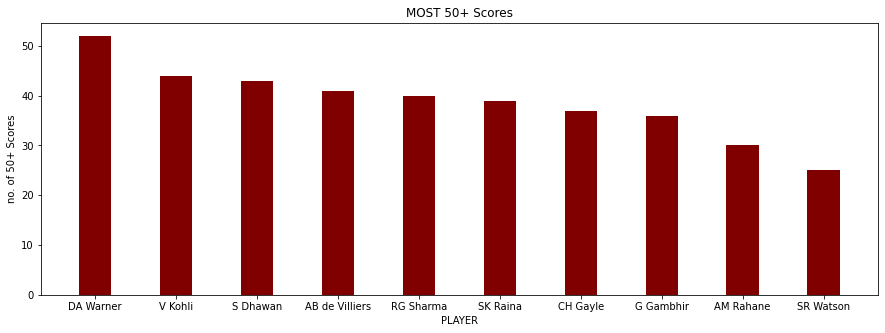

In [27]:
fig = plt.figure(figsize = (15, 5))
plt.bar(fiftyplus['batsman'],fiftyplus['50+ Scores'],color ='maroon',width = 0.4)
plt.title('MOST 50+ Scores')
plt.xlabel("PLAYER")
plt.ylabel("no. of 50+ Scores")
plt.show()

# 2. TOP RIVALRIES

# 2.1 BOWLERS DISMISSING A PARTICULAR BATSMAN MOST TIMES 

In [28]:
BowlerData = BowlerWicketData[['bowler','is_wicket','dismissal_kind','player_dismissed']]

In [29]:
bowlervsbatsman = BowlerData.groupby(['bowler','player_dismissed'])['is_wicket'].sum().sort_values(ascending = False).head(10)

In [30]:
bowlervsbatsman

bowler          player_dismissed
Sandeep Sharma  V Kohli             7
Z Khan          MS Dhoni            7
PP Ojha         MS Dhoni            6
B Kumar         PA Patel            6
R Vinay Kumar   RG Sharma           6
A Mishra        RG Sharma           6
AR Patel        SR Watson           6
A Mishra        SR Watson           6
PP Chawla       AT Rayudu           6
B Kumar         AM Rahane           6
Name: is_wicket, dtype: int64

<AxesSubplot:xlabel='bowler,player_dismissed'>

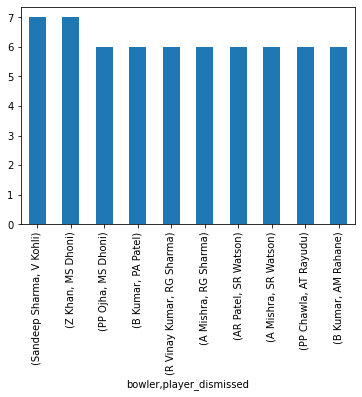

In [31]:
bowlervsbatsman.plot(x='bowler',y='No.of wickets',kind='bar')

# 2.2 BATSMEN SCORING MOST RUNS AGAINST A PARTICULAR BOWLER

In [32]:
batsmanvsbowler = B_Data.groupby(['batsman','bowler'])['batsman_runs'].sum().sort_values(ascending = False).head(10)

In [33]:
batsmanvsbowler

batsman     bowler         
SK Raina    PP Chawla          175
V Kohli     R Ashwin           160
DA Warner   SP Narine          158
V Kohli     A Mishra           158
            DJ Bravo           151
S Dhawan    Harbhajan Singh    147
RG Sharma   PP Chawla          146
            UT Yadav           143
V Kohli     UT Yadav           141
KA Pollard  A Mishra           135
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman,bowler'>

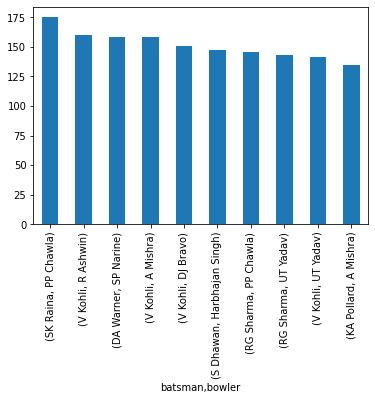

In [34]:
batsmanvsbowler.plot(x='batsman',y='batsman_runs',kind='bar')

# 3. SOME BOWLERS STATS

# 3.1 BOWLERS WHO GAVE MOST EXTRAS

In [35]:
extraruns = B_Data.groupby('bowler')['extra_runs'].sum().sort_values(ascending = False).head(10).reset_index()

In [36]:
extraruns

,bowler,extra_runs
0,SL Malinga,293
1,P Kumar,236
2,UT Yadav,226
3,DJ Bravo,210
4,B Kumar,201
5,I Sharma,196
6,RP Singh,181
7,DW Steyn,177
8,R Ashwin,175
9,SR Watson,171


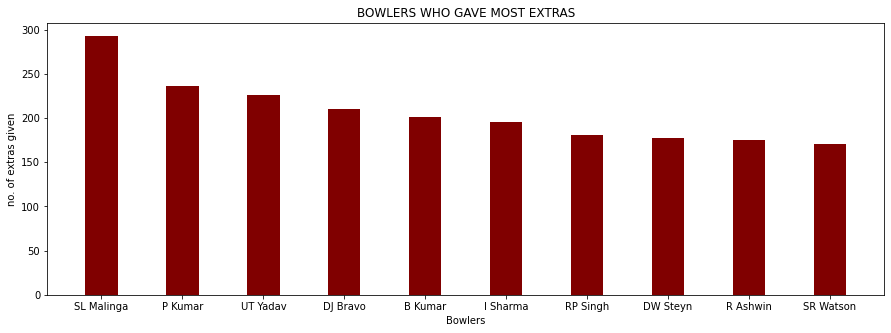

In [37]:
fig = plt.figure(figsize = (15, 5))
plt.bar(extraruns['bowler'],extraruns['extra_runs'],color ='maroon',width = 0.4)
plt.title('BOWLERS WHO GAVE MOST EXTRAS')
plt.xlabel("Bowlers")
plt.ylabel("no. of extras given")
plt.show()

# 3.2 BOWLERS CONCEIVING MOST BOUNDARIES

In [38]:
BoundaryData = B_Data[B_Data['batsman_runs'].isin([4,6])].reset_index()

In [39]:
mostboundaries = BoundaryData.groupby('bowler')['batsman_runs'].count().sort_values(ascending = False).head(10).reset_index().rename(columns={'batsman_runs':'Boundaries Conceived'})

In [40]:
mostboundaries

,bowler,Boundaries Conceived
0,UT Yadav,509
1,PP Chawla,497
2,DJ Bravo,443
3,P Kumar,442
4,Harbhajan Singh,431
5,B Kumar,424
6,SL Malinga,400
7,A Mishra,394
8,R Vinay Kumar,394
9,I Sharma,378


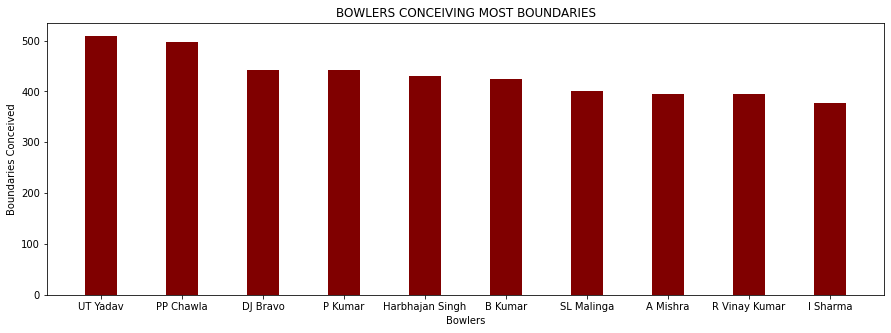

In [41]:
fig = plt.figure(figsize = (15, 5))
plt.bar(mostboundaries['bowler'],mostboundaries['Boundaries Conceived'],color ='maroon',width = 0.4)
plt.title('BOWLERS CONCEIVING MOST BOUNDARIES')
plt.xlabel("Bowlers")
plt.ylabel("Boundaries Conceived")
plt.show()

# 4. OTHER STATS

# 4.1 TOP 5 VENUES WITH MOST MATCHES 

In [42]:
venuedata = M_Data.groupby('venue')['id'].count().sort_values(ascending = False).head(5).reset_index().rename(columns={'id':'Matches'})

In [43]:
venuedata

,venue,Matches
0,Eden Gardens,77
1,Feroz Shah Kotla,74
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",64


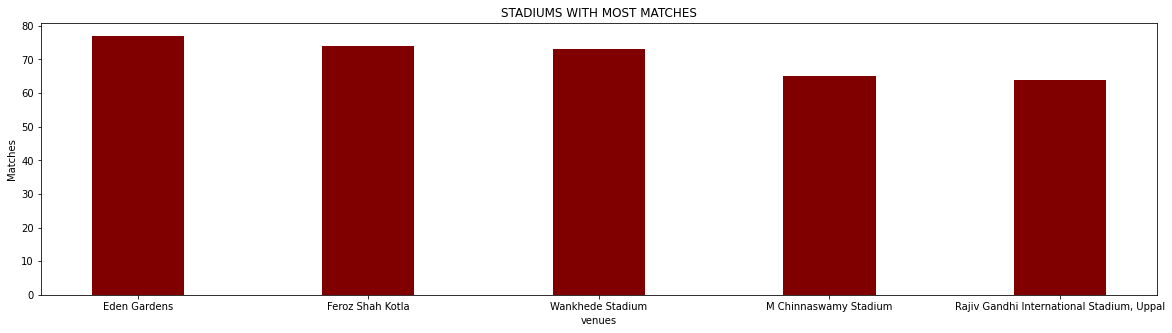

In [51]:
fig = plt.figure(figsize = (20, 5))
plt.bar(venuedata['venue'],venuedata['Matches'],color ='maroon',width = 0.4)
plt.title('STADIUMS WITH MOST MATCHES')
plt.xlabel("venues")
plt.ylabel("Matches")
plt.show()

# 4.2 BATTING FIRST VS BATTING SECOND 

In [45]:
Batting_first = M_Data[M_Data['result']=='runs']['id'].count()

In [46]:
Batting_first

364

In [47]:
Batting_second = M_Data[M_Data['result']=='wickets']['id'].count()

In [48]:
Batting_second

435

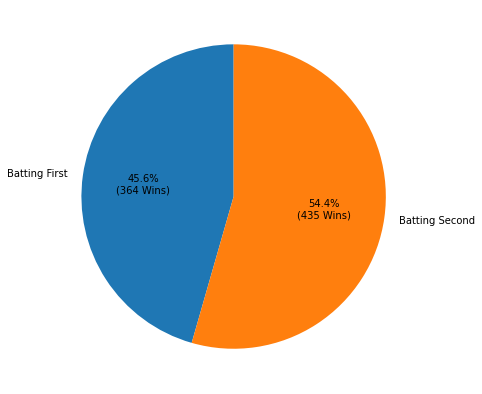

In [49]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} Wins)".format(pct, absolute)
y =[364,435]
mylabels = ["Batting First", "Batting Second"]
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(y,autopct = lambda pct: func(pct, y),labels = mylabels,startangle = 90)
                                  
plt.show() 

# 4.3 Five Most Expensive Overs in IPL history

In [50]:
B_Data.groupby(['id','inning','over','bowler'])['batsman_runs'].sum().sort_values(ascending = False).head(5).reset_index()

,id,inning,over,bowler,batsman_runs
0,501247,2,2,P Parameswaran,36
1,734047,2,5,P Awana,32
2,548327,2,12,R Sharma,31
3,335988,2,12,A Symonds,30
4,980987,1,18,S Kaushik,30
